In [1]:
scores = '../out/ko_scores.txt'

In [2]:
# plotting imports
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

plt.rc('font', size=12)

In [3]:
# other imports
import random
import itertools
import numpy as np
import pandas as pd
import fastcluster as fst
import matplotlib.patches as patches

In [4]:
m = pd.read_table(scores)
p = m.pivot_table(index=['strain', 'gene'],
                  columns='condition',
                  values='score')

In [5]:
c = p.copy(deep=True)
c[np.isnan(c)] = 0.
rl = fst.linkage(c, method='average')
cl = fst.linkage(c.T, method='average')
cmap = plt.get_cmap('vlag')
cmap.set_bad('green')

In [6]:
strains = {x[0] for x in p.index}
cstrains = {x: c
            for x, c in zip(strains, ['red', 'blue', 'green', 'black'])}

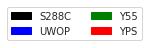

In [7]:
plt.figure(figsize=(2, 0.5))

handles = []
for k, v in sorted(cstrains.items(), key=lambda x: x[0]):
    handles.append(patches.Patch(color=v, label=k))

plt.legend(handles=handles, ncol=int(len(handles)/2),
           loc='center')
plt.yticks([])
plt.xticks([])
sns.despine(left=True,
            bottom=True)

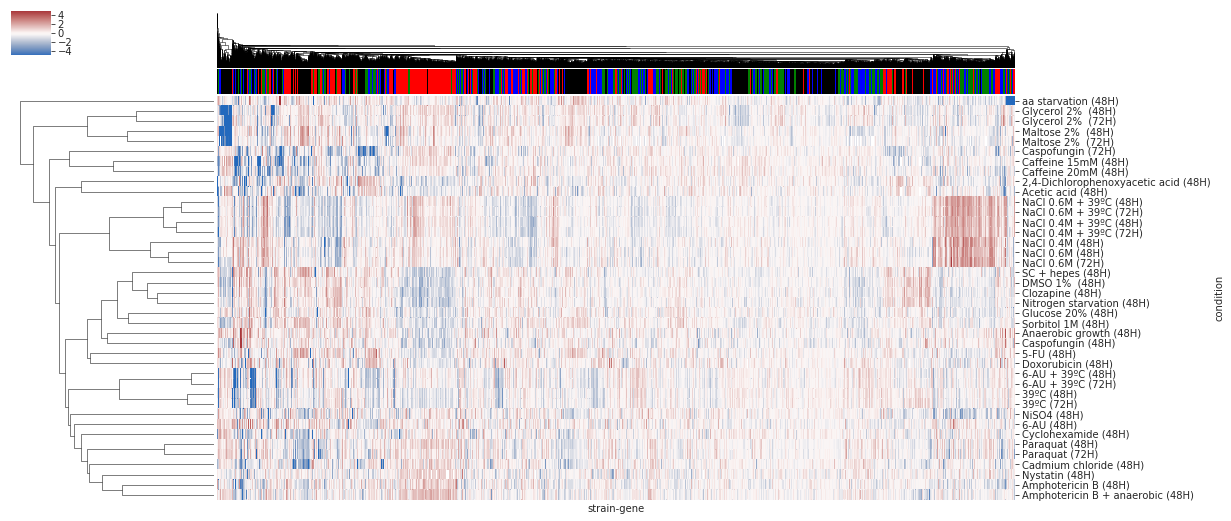

In [8]:
mclust = sns.clustermap(p.T,
                        cmap=cmap,
                        center=0,
                        vmax=5,
                        vmin=-5,
                        xticklabels=False,
                        yticklabels=True,
                        row_linkage=cl,
                        col_linkage=rl,
                        figsize=(18, 9),
                        col_colors=[cstrains[x[0]]
                                    for x in p.index]);

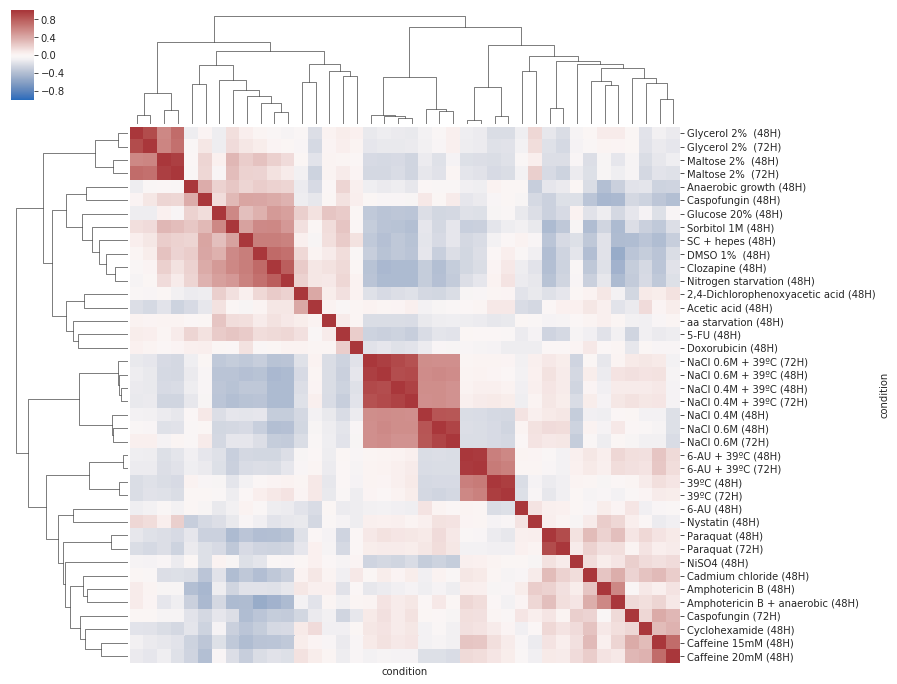

In [9]:
mclust = sns.clustermap(p.corr(),
                        cmap=cmap,
                        center=0,
                        vmax=1,
                        vmin=-1,
                        xticklabels=False,
                        yticklabels=True,
                        figsize=(12, 12));

<h5><a href="javascript:toggle()" target="_self">toggle source code</a></h5>